## Model Registry

In [1]:
import mlflow
from sklearn.ensemble import RandomForestRegressor
from mlflow_utils import create_mlflow_experiment

class CustomModel(mlflow.pyfunc.PythonModel):

    def predict(self, context, model_input):
        prediction = model_input
        return prediction

c:\Users\dof07\anaconda3\envs\mlflow\lib\site-packages\mlflow\pyfunc\utils\data_validation.py:168: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


#### Create an experiment

In [2]:
experiment_id = create_mlflow_experiment(
    experiment_name="model_registry",
    artifact_location="model_registry_artifacts",
    tags={"purpose": "learning"},
)

Experiment model_registry already exists.


#### Run three models

- The first two models will be registerd but not the third one.

In [3]:
with mlflow.start_run(experiment_id=experiment_id, run_name="model_registry") as run:
    model = CustomModel()
    mlflow.pyfunc.log_model(artifact_path="custom_model", python_model=model, registered_model_name="CustomModel")
    mlflow.sklearn.log_model(artifact_path="rfr_model", sk_model=RandomForestRegressor(), registered_model_name="RandomForestRegressor")
    mlflow.sklearn.log_model(artifact_path="rft_modelx", sk_model=RandomForestRegressor())            

2025/03/04 16:12:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'CustomModel'.
Created version '1' of model 'CustomModel'.
2025/03/04 16:12:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'RandomForestRegressor'.
Created version '1' of model 'RandomForestRegressor'.
2025/03/04 16:12:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


##### All of the three models are saved as artifacts

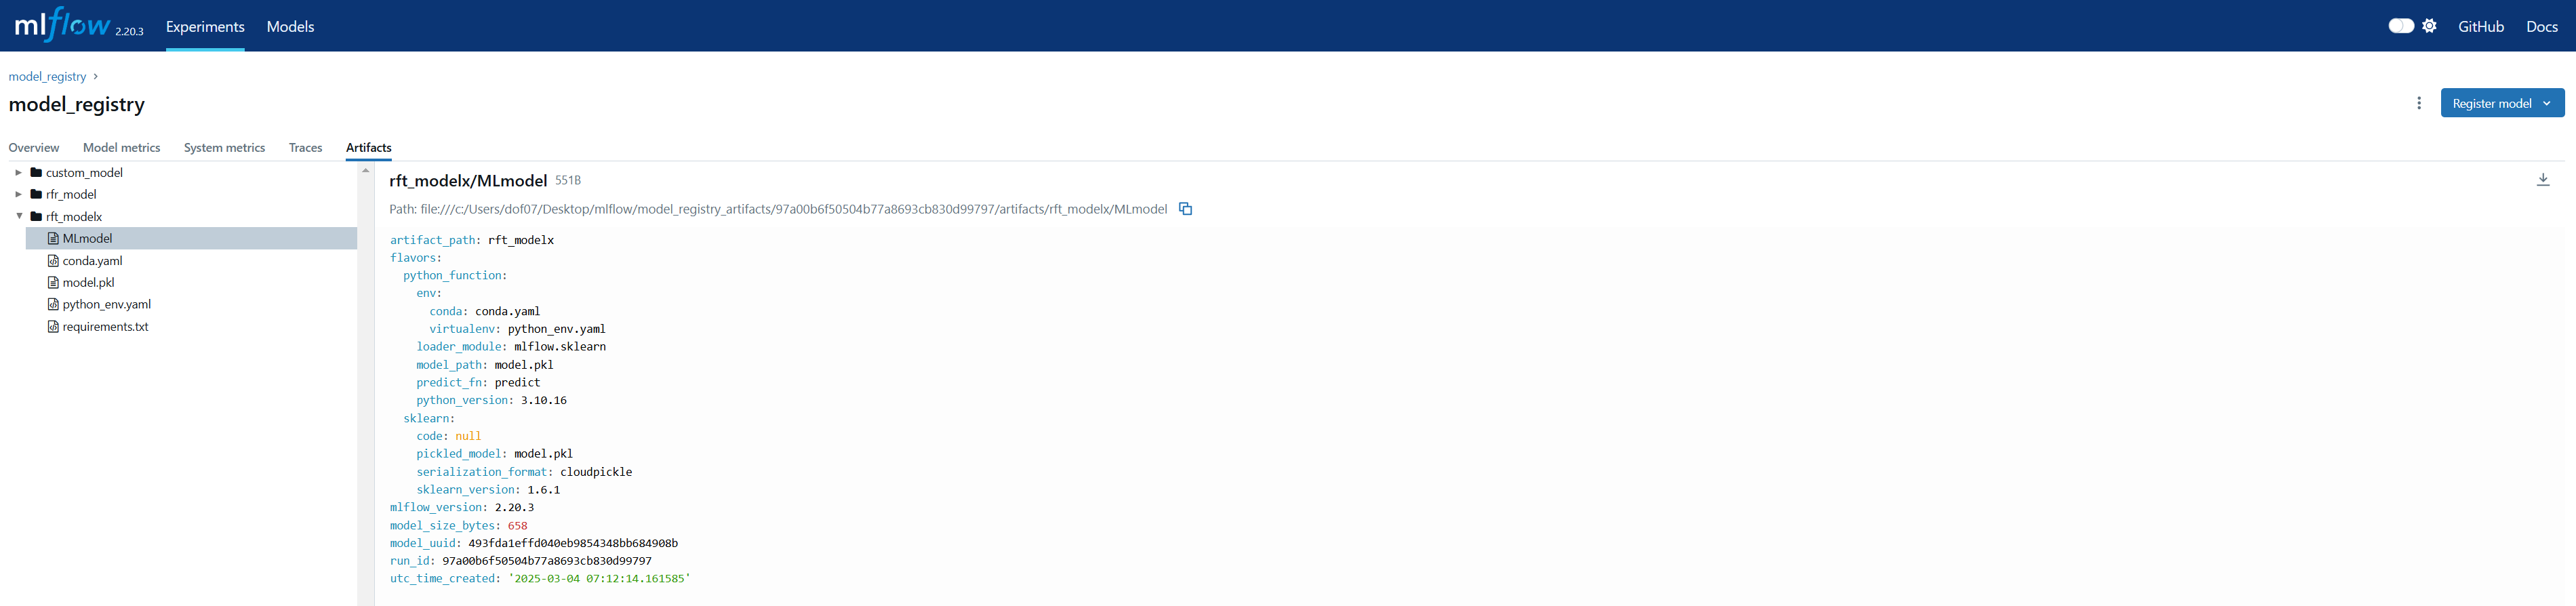

### Only the first two models with registry name are regitstered in Models tab

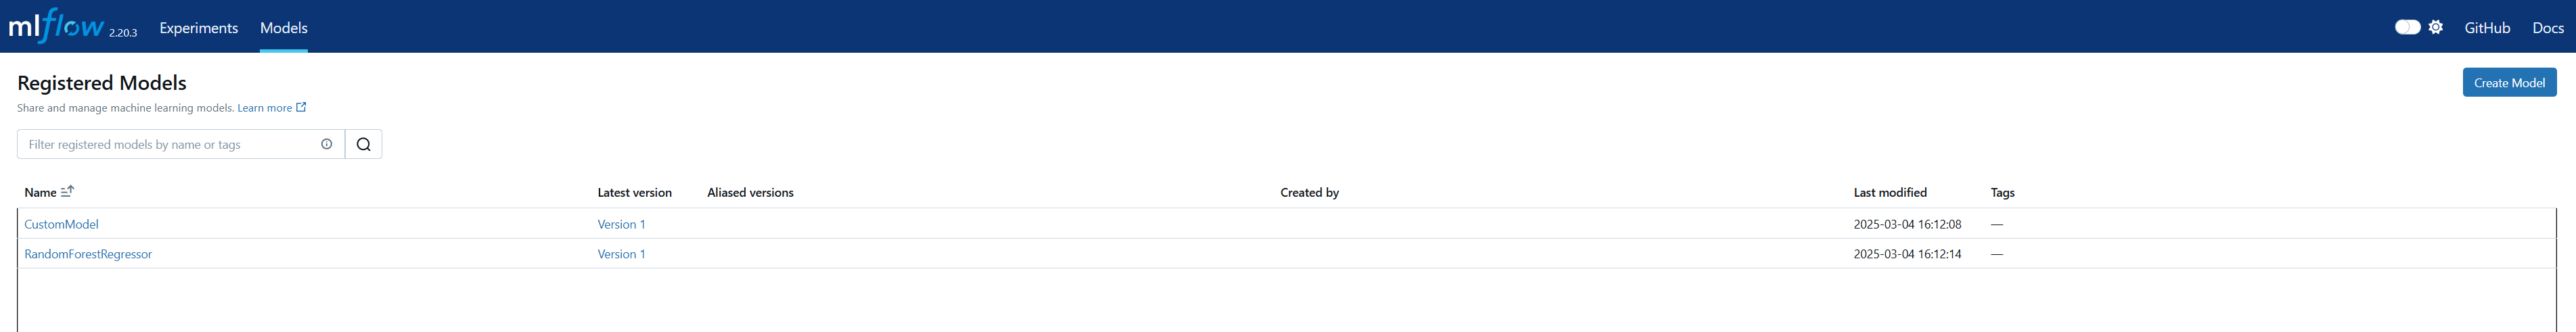

##### You can register the third model on MLflow ui.

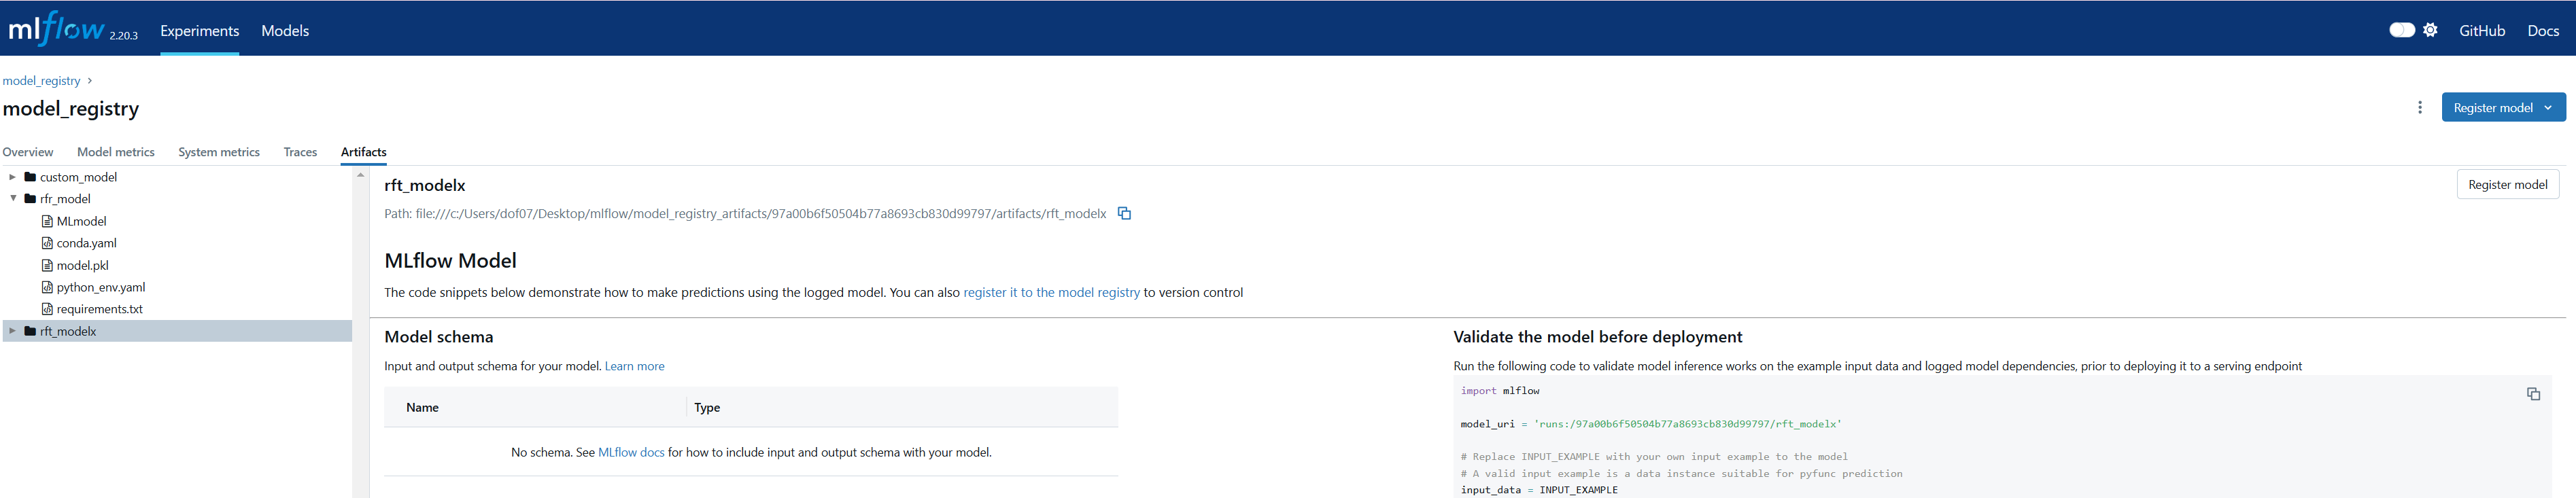

##### You can choose which model to overwrite with this unregisted model

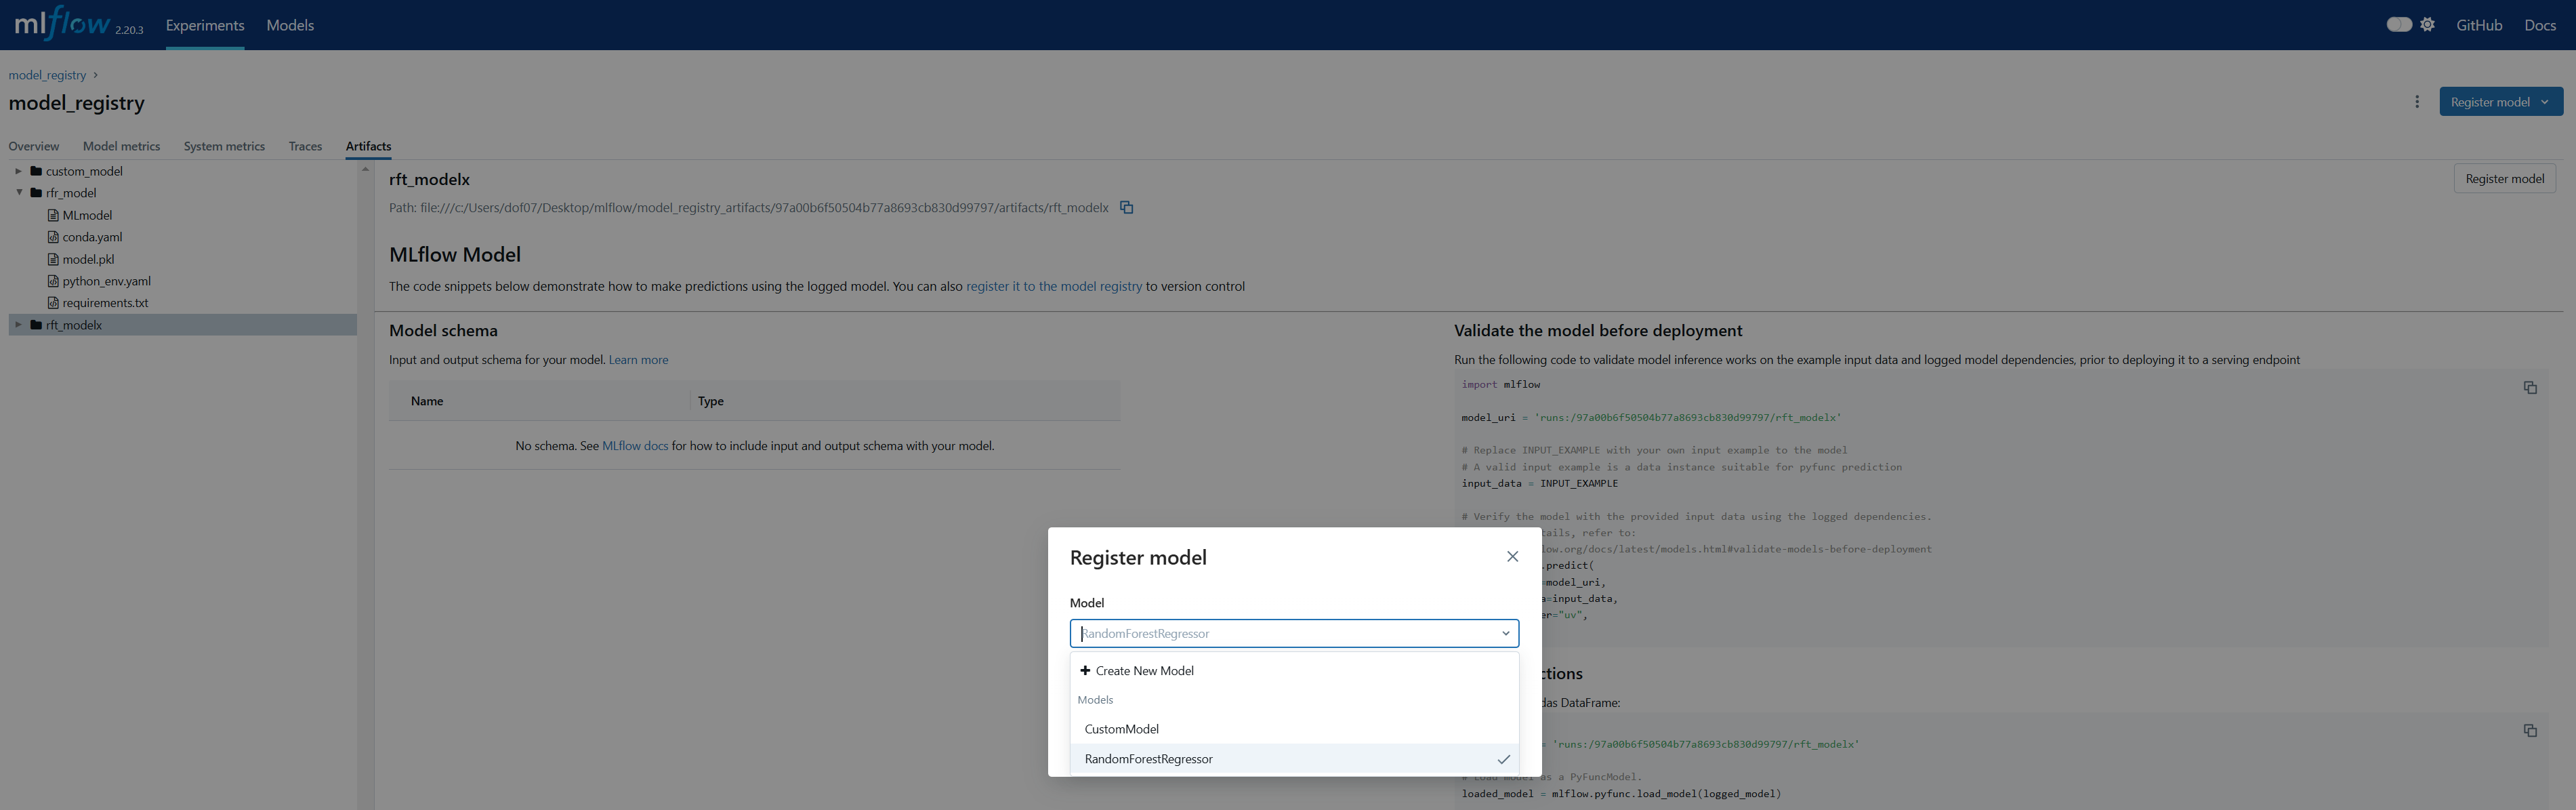

##### Choosing RandomForestRegressor results in a new version of it.

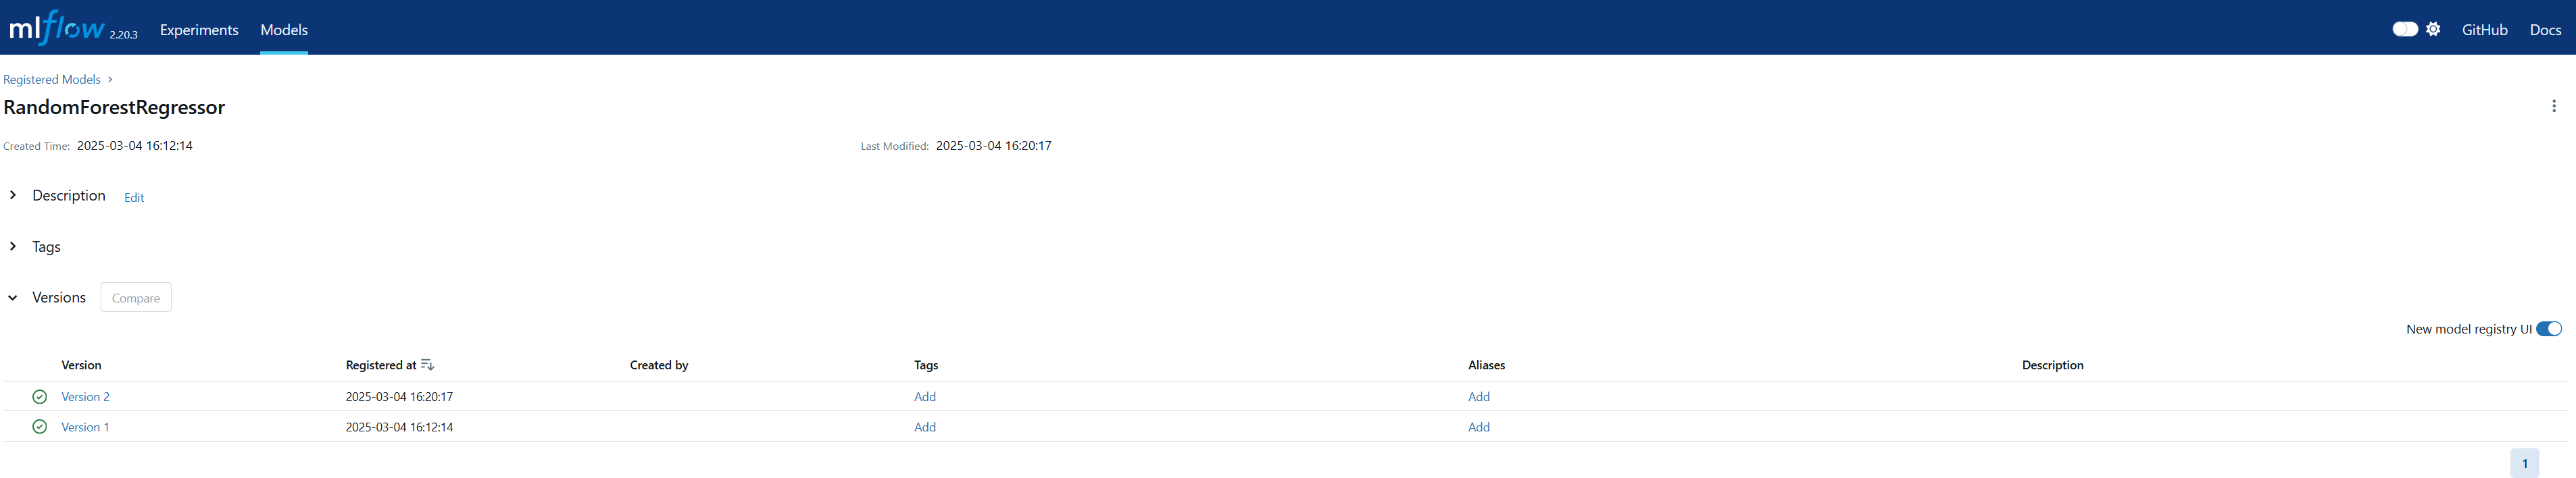